In [31]:
import pandas as pd
import nltk
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import os
from scipy.stats import randint
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [32]:
data = pd.read_csv('Downloads/Reddit-ADPS-Data_2.csv', encoding= 'unicode_escape')

In [33]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8330 entries, 0 to 8329
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   post        8315 non-null   object 
 1   topics      8330 non-null   object 
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  4 non-null      object 
dtypes: float64(1), object(3)
memory usage: 260.4+ KB


In [34]:
data.shape


(8330, 4)

In [35]:
data.head()

,post,topics,Unnamed: 2,Unnamed: 3
0,Does anyone else get anxious with working? im scared that im going to have to do repairs that cost of money.,anxiety,NaN,NaN
1,"Help with anxiety-inducing fears about school caused by a health issue I'm 35 and planning to go back to grad school, but over the years I developed some eye floaters that I can mostly ignore. They are just out of my visible sight range when reading small books like novels, but I started studying for the GRE with a big textbook and realized how obvious these floaters were now, and they've left me with anxiety about how I'm going to cope with school if, on top of everything else like how I'm no longer used to student life, how grad school is likely the hardest form of school I've ever done etc, add to that this problem with distracting floaters in my eyes that distract and annoy me.\n\nI really don't know how to deal here. I am not confident in exposure therapy as I have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that I don't have to deal with them. It's not a big issue, and some junk in my eyes shouldn't be THAT much of a problem. But just now I just glanced at my book for a few minutes and now I'm dizzy with worry about it.\n\nWhat to do?",anxiety,NaN,NaN
2,"Use up what's left and throw the rest away I recently returned from 6 years working overseas.\n\nUnfortunately in the last few years my drinking and stimulant became worse and was detrimental to my mental and physical health.\n\nI'm doing fine now as far as that is concerned. Attended therapy, clean and sober since November last year.\n\nWhen I came back I heard a few of my ""friends"" use the following phrase,\n\n""we'll just use up what's left of him and then throw the rest away""\n\nI've never heard this before. I've always been a people pleasing personality type and I'm struggling hard to determine how to interpret it.\n\nMaybe I just don't want to face facts that it means exactly what it says... That by hanging around with these people I put myself in a weak position and they aren't real friends at all.\n\nAny thoughts?",anxiety,NaN,NaN
3,"My brain is driving me crazy! Im a perfectionist and think everyone hates me all the time. I literally always worried Ive done something wrong. \n\nIm at my first big professional conference in a major us city. I barely slept last night because of a backache and nerves. That and the jet lag is impairing my functioning and I have blotchy skin and my dress is riding up on my legs and Ive had to pull it down. All I had to do today was register for the conference, but I was confused at every step and feel that everyone thinks Im stupid or hungover or unprofessional or something. Im walking around this city I do not know oblivious and feel embarrassed and stupid. My anxiety is killing me and men keep hitting on me. I havent been away from my husband since we moved in together and I feel so dumb and small. \n\nIm so scared for my presentation tomorrow. Can someone either console me or kindly put me out of my misery?",anxiety,NaN,NaN
4,"Does anyone else feel like the worst person ever if they annoy a friend? Hey Reddit. Basically, I have mild anxiety. But something that really messes with my head is when I have a fall out or get a blunt text from a friend to say I annoyed them when I did something. My first response is always I'm sorry (and trying not to say it a million times over) but my mind then goes through this turmoil where I have all these esteem lowering thoughts along the lines of, they'll hate me forever now, or I'm such a horrible person, as well as being filled with guilt for upsetting the person.\nIt always turns out that whatever I did wrong only annoyed them for a short period of time and before I knew it life is back to normal, I just wish I could control the horrible negative wave that comes over me",anxiety,NaN,NaN


In [36]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        post  topics  Unnamed: 2  Unnamed: 3
0     False  False   True        True      
1     False  False   True        True      
2     False  False   True        True      
3     False  False   True        True      
4     False  False   True        True      
...     ...    ...    ...         ...      
8325  False  False   True        True      
8326  False  False   True        True      
8327  False  False   True        True      
8328  False  False   True        True      
8329  False  False   True        True      

[8330 rows x 4 columns]>

In [37]:
#REMOVING COLUMNS
#data.drop(columns=['postId','date','Postno','subtopics','platform'],inplace=True)
#REMOVING COLUMNS
data.drop(columns=['Unnamed: 2','Unnamed: 3'],inplace=True)

In [38]:
data.head()
data=data.dropna()

In [39]:
#how many unique catagories are there.
data.isnull().sum()
pd.DataFrame(data.topics.unique()).values

array([['anxiety'],
       ['depression'],
       ['ptsd'],
       ['socialanxiety'],
       ['suicidewatch']], dtype=object)

In [40]:
# Renaming categories
data.replace({'topics':
    {'anxiety':'Anxiety',
    'depression':'Depression',
    'ptsd':'PTSD',
    'socialanxiety':'Social Anxiety',
    'suicidewatch':'Suicidal thoughts',
    }},
             inplace=True)
    
pd.DataFrame(data.topics.unique()).values
    


array([['Anxiety'],
       ['Depression'],
       ['PTSD'],
       ['Social Anxiety'],
       ['Suicidal thoughts']], dtype=object)

In [41]:
import re
data['post']=data['post'].str.replace(r"http\S+"," ")
data['post']= data['post'].str.replace("\n\n","  ")
data['post']= data['post'].apply(lambda x: x.lower())
data['post']= data['post'].str.encode('ascii', 'ignore').str.decode('ascii')

C:\Users\Dell\AppData\Local\Temp\ipykernel_11332\504301372.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['post']=data['post'].str.replace(r"http\S+"," ")


In [42]:
display(data)

,post,topics
0,does anyone else get anxious with working? im scared that im going to have to do repairs that cost of money.,Anxiety
1,"help with anxiety-inducing fears about school caused by a health issue i'm 35 and planning to go back to grad school, but over the years i developed some eye floaters that i can mostly ignore. they are just out of my visible sight range when reading small books like novels, but i started studying for the gre with a big textbook and realized how obvious these floaters were now, and they've left me with anxiety about how i'm going to cope with school if, on top of everything else like how i'm no longer used to student life, how grad school is likely the hardest form of school i've ever done etc, add to that this problem with distracting floaters in my eyes that distract and annoy me. i really don't know how to deal here. i am not confident in exposure therapy as i have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that i don't have to deal with them. it's not a big issue, and some junk in my eyes shouldn't be that much of a problem. but just now i just glanced at my book for a few minutes and now i'm dizzy with worry about it. what to do?",Anxiety
2,"use up what's left and throw the rest away i recently returned from 6 years working overseas. unfortunately in the last few years my drinking and stimulant became worse and was detrimental to my mental and physical health. i'm doing fine now as far as that is concerned. attended therapy, clean and sober since november last year. when i came back i heard a few of my ""friends"" use the following phrase, ""we'll just use up what's left of him and then throw the rest away"" i've never heard this before. i've always been a people pleasing personality type and i'm struggling hard to determine how to interpret it. maybe i just don't want to face facts that it means exactly what it says... that by hanging around with these people i put myself in a weak position and they aren't real friends at all. any thoughts?",Anxiety
3,"my brain is driving me crazy! im a perfectionist and think everyone hates me all the time. i literally always worried ive done something wrong. im at my first big professional conference in a major us city. i barely slept last night because of a backache and nerves. that and the jet lag is impairing my functioning and i have blotchy skin and my dress is riding up on my legs and ive had to pull it down. all i had to do today was register for the conference, but i was confused at every step and feel that everyone thinks im stupid or hungover or unprofessional or something. im walking around this city i do not know oblivious and feel embarrassed and stupid. my anxiety is killing me and men keep hitting on me. i havent been away from my husband since we moved in together and i feel so dumb and small. im so scared for my presentation tomorrow. can someone either console me or kindly put me out of my misery?",Anxiety
4,"does anyone else feel like the worst person ever if they annoy a friend? hey reddit. basically, i have mild anxiety. but something that really messes with my head is when i have a fall out or get a blunt text from a friend to say i annoyed them when i did something. my first response is always i'm sorry (and trying not to say it a million times over) but my mind then goes through this turmoil where i have all these esteem lowering thoughts along the lines of, they'll hate me forever now, or i'm such a horrible person, as well as being filled with guilt for upsetting the person.\nit always turns out that whatever i did wrong only annoyed them for a short period of time and before i knew it life is back to normal, i just wish i could control the horrible negative wave that comes over me",Anxiety
...,...,...
8325,"alone, useless and horribly guilty reaching out here because i have nothing else. no friends or family or anything. no money or hobbies or interests or a career

In [43]:
#Now, we will map each of these categories to a number, so that our model can understand it in a better way and we will save this in a new column named ‘category_id’. Where each of the 12 categories is represented in numerical.
# Create a new column 'category_id' with encoded categories 
data['category_id'] = data['topics'].factorize()[0]
category_id_df = data[['topics', 'category_id']].drop_duplicates()


In [44]:
# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'topics']].values)
# New dataframe
data.head()

,post,topics,category_id
0,does anyone else get anxious with working? im scared that im going to have to do repairs that cost of money.,Anxiety,0
1,"help with anxiety-inducing fears about school caused by a health issue i'm 35 and planning to go back to grad school, but over the years i developed some eye floaters that i can mostly ignore. they are just out of my visible sight range when reading small books like novels, but i started studying for the gre with a big textbook and realized how obvious these floaters were now, and they've left me with anxiety about how i'm going to cope with school if, on top of everything else like how i'm no longer used to student life, how grad school is likely the hardest form of school i've ever done etc, add to that this problem with distracting floaters in my eyes that distract and annoy me. i really don't know how to deal here. i am not confident in exposure therapy as i have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that i don't have to deal with them. it's not a big issue, and some junk in my eyes shouldn't be that much of a problem. but just now i just glanced at my book for a few minutes and now i'm dizzy with worry about it. what to do?",Anxiety,0
2,"use up what's left and throw the rest away i recently returned from 6 years working overseas. unfortunately in the last few years my drinking and stimulant became worse and was detrimental to my mental and physical health. i'm doing fine now as far as that is concerned. attended therapy, clean and sober since november last year. when i came back i heard a few of my ""friends"" use the following phrase, ""we'll just use up what's left of him and then throw the rest away"" i've never heard this before. i've always been a people pleasing personality type and i'm struggling hard to determine how to interpret it. maybe i just don't want to face facts that it means exactly what it says... that by hanging around with these people i put myself in a weak position and they aren't real friends at all. any thoughts?",Anxiety,0
3,"my brain is driving me crazy! im a perfectionist and think everyone hates me all the time. i literally always worried ive done something wrong. im at my first big professional conference in a major us city. i barely slept last night because of a backache and nerves. that and the jet lag is impairing my functioning and i have blotchy skin and my dress is riding up on my legs and ive had to pull it down. all i had to do today was register for the conference, but i was confused at every step and feel that everyone thinks im stupid or hungover or unprofessional or something. im walking around this city i do not know oblivious and feel embarrassed and stupid. my anxiety is killing me and men keep hitting on me. i havent been away from my husband since we moved in together and i feel so dumb and small. im so scared for my presentation tomorrow. can someone either console me or kindly put me out of my misery?",Anxiety,0
4,"does anyone else feel like the worst person ever if they annoy a friend? hey reddit. basically, i have mild anxiety. but something that really messes with my head is when i have a fall out or get a blunt text from a friend to say i annoyed them when i did something. my first response is always i'm sorry (and trying not to say it a million times over) but my mind then goes through this turmoil where i have all these esteem lowering thoughts along the lines of, they'll hate me forever now, or i'm such a horrible person, as well as being filled with guilt for upsetting the person.\nit always turns out that whatever i did wrong only annoyed them for a short period of time and before i knew it life is back to normal, i just wish i could control the horrible negative wave that comes over me",Anxiety,0


In [45]:
category_to_id

{'Anxiety': 0,
 'Depression': 1,
 'PTSD': 2,
 'Social Anxiety': 3,
 'Suicidal thoughts': 4}

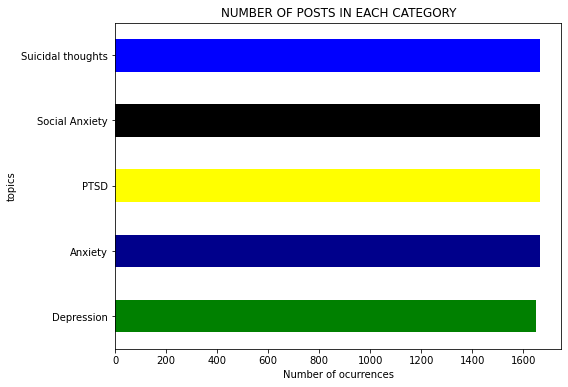

In [46]:
fig = plt.figure(figsize=(8,6))
colors = ['green','darkblue','yellow',
    'black','blue','orange']
data.groupby('topics').post.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF POSTS IN EACH CATEGORY')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [47]:
#expanding the dispay of text sms column
pd.set_option('display.max_colwidth', -1)
#using only v1 and v2 column
#data= data [['post','topics']]
#data.head()
#checking the count of the dependent variable
data['post'].value_counts()

C:\Users\Dell\AppData\Local\Temp\ipykernel_11332\4119234637.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


"no regrets or grudges/angry at things that have passed, and not worrying too much about the future, that's true serenity."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                5
restless and agitated                                                                                                                                                                                                                      

In [48]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
# We transform each complaint into a vector
features = tfidf.fit_transform(data.post).toarray()
labels = data.category_id
print("Each of the %d posts is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 8315 posts is represented by 19196 features (TF-IDF score of unigrams and bigrams)


In [49]:
display(data)

,post,topics,category_id
0,does anyone else get anxious with working? im scared that im going to have to do repairs that cost of money.,Anxiety,0
1,"help with anxiety-inducing fears about school caused by a health issue i'm 35 and planning to go back to grad school, but over the years i developed some eye floaters that i can mostly ignore. they are just out of my visible sight range when reading small books like novels, but i started studying for the gre with a big textbook and realized how obvious these floaters were now, and they've left me with anxiety about how i'm going to cope with school if, on top of everything else like how i'm no longer used to student life, how grad school is likely the hardest form of school i've ever done etc, add to that this problem with distracting floaters in my eyes that distract and annoy me. i really don't know how to deal here. i am not confident in exposure therapy as i have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that i don't have to deal with them. it's not a big issue, and some junk in my eyes shouldn't be that much of a problem. but just now i just glanced at my book for a few minutes and now i'm dizzy with worry about it. what to do?",Anxiety,0
2,"use up what's left and throw the rest away i recently returned from 6 years working overseas. unfortunately in the last few years my drinking and stimulant became worse and was detrimental to my mental and physical health. i'm doing fine now as far as that is concerned. attended therapy, clean and sober since november last year. when i came back i heard a few of my ""friends"" use the following phrase, ""we'll just use up what's left of him and then throw the rest away"" i've never heard this before. i've always been a people pleasing personality type and i'm struggling hard to determine how to interpret it. maybe i just don't want to face facts that it means exactly what it says... that by hanging around with these people i put myself in a weak position and they aren't real friends at all. any thoughts?",Anxiety,0
3,"my brain is driving me crazy! im a perfectionist and think everyone hates me all the time. i literally always worried ive done something wrong. im at my first big professional conference in a major us city. i barely slept last night because of a backache and nerves. that and the jet lag is impairing my functioning and i have blotchy skin and my dress is riding up on my legs and ive had to pull it down. all i had to do today was register for the conference, but i was confused at every step and feel that everyone thinks im stupid or hungover or unprofessional or something. im walking around this city i do not know oblivious and feel embarrassed and stupid. my anxiety is killing me and men keep hitting on me. i havent been away from my husband since we moved in together and i feel so dumb and small. im so scared for my presentation tomorrow. can someone either console me or kindly put me out of my misery?",Anxiety,0
4,"does anyone else feel like the worst person ever if they annoy a friend? hey reddit. basically, i have mild anxiety. but something that really messes with my head is when i have a fall out or get a blunt text from a friend to say i annoyed them when i did something. my first response is always i'm sorry (and trying not to say it a million times over) but my mind then goes through this turmoil where i have all these esteem lowering thoughts along the lines of, they'll hate me forever now, or i'm such a horrible person, as well as being filled with guilt for upsetting the person.\nit always turns out that whatever i did wrong only annoyed them for a short period of time and before i knew it life is back to normal, i just wish i could control the horrible negative wave that comes over me",Anxiety,0
...,...,...,...
8325,"alone, useless and horribly guilty reaching out here because i have nothing else. no friends or family or anything. no money or hobbie

In [50]:
# Finding the three most correlated terms with each of the product categories
N = 3
for topics, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("n==> %s:" %(topics))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Anxiety:
  * Most Correlated Unigrams are: attack, panic, anxiety
  * Most Correlated Bigrams are: anxiety attack, panic attack, panic attacks


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Depression:
  * Most Correlated Unigrams are: worried, nervous, restless
  * Most Correlated Bigrams are: heart restless, feeling restless, restless restless


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> PTSD:
  * Most Correlated Unigrams are: flashbacks, trauma, ptsd
  * Most Correlated Bigrams are: sexual assault, sexual abuse, diagnosed ptsd


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Social Anxiety:
  * Most Correlated Unigrams are: awkward, sa, social
  * Most Correlated Bigrams are: social skills, socially anxious, social anxiety
n==> Suicidal thoughts:
  * Most Correlated Unigrams are: die, kill, suicide
  * Most Correlated Bigrams are: want end, end life, want die


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [54]:
X = data['post'] # Collection of documents
y = data['topics'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                  #  test_size=0.20,
                                                  #  random_state = 0)

In [25]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0,solver='lbfgs', max_iter=1000 ),
]

In [26]:
# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [27]:
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [28]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.727721,0.057012
LogisticRegression,0.739387,0.054264
MultinomialNB,0.706915,0.078521
RandomForestClassifier,0.659050,0.082899


In [344]:
#print(data)

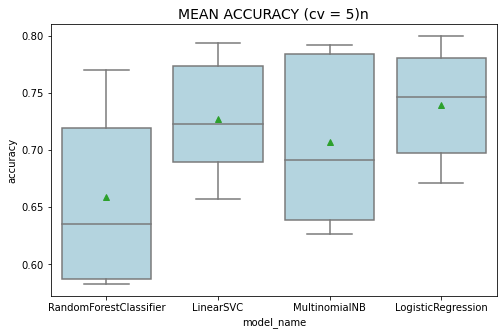

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)n", size=14);

In [30]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               data.index, test_size=0.20, 
                                                               random_state=1)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [ ]:
 

dt_clf_gini = DecisionTreeClassifier(criterion = "gini",
                                     random_state = 100,
                                     max_depth = 5,
                                     min_samples_leaf = 5)
 
dt_clf_gini.fit(X_train, y_train)
y_pred_gini = dt_clf_gini.predict(X_test)
 
print ("Decision Tree using Gini Index\nAccuracy is ",
             accuracy_score(y_test, y_pred_gini)*100 )

In [347]:
# Classification report
print('ttttCLASSIFICATIION METRICSn')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= data['topics'].unique()))

ttttCLASSIFICATIION METRICSn
                   precision    recall  f1-score   support

          Anxiety       0.69      0.69      0.69       358
       Depression       0.61      0.56      0.59       317
             PTSD       0.92      0.86      0.89       360
   Social Anxiety       0.82      0.78      0.80       332
Suicidal thoughts       0.67      0.79      0.73       336

         accuracy                           0.74      1703
        macro avg       0.74      0.74      0.74      1703
     weighted avg       0.74      0.74      0.74      1703



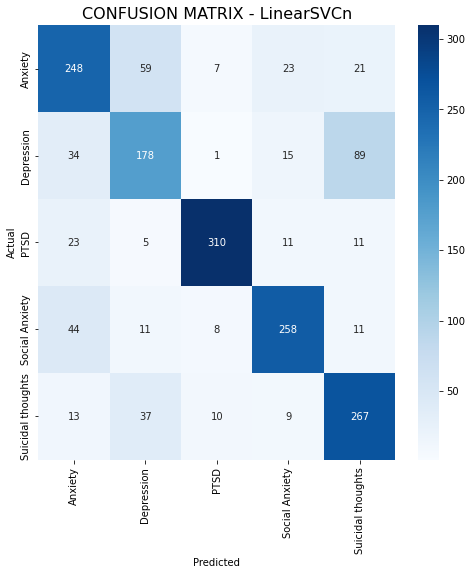

In [348]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.topics.values, 
            yticklabels=category_id_df.topics.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVCn", size=16);

In [349]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,  random_state = 0)
                                                  
                                                    


In [350]:
fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)
model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [351]:
result = """Does anyone else get depressive thoughts and immediately hate yourself for them after? Whenever I think depressive thoughts like "your friends are all pulling away from you because they don't need you" or "Everyone is better off without you because you're such a burden" or whatever else, those thoughts are immediately followed by thoughts about how I'm stupid and selfish and childish for wallowing in pity and I should just suck it up because I need to grow up and realize that it's not all about me. 

It feels like a cycle that only ever makes me feel worse, especially about trying to reach out and have to burden someone else with my shit when they have their own shit going on. 

I couldn't even go to a second therapy session because I felt guilty for taking up the time of those who have to drive me there, and for taking up time from the counselor that could be used for someone that needed it a lot more.

Does anyone else get like this?"""
print(model.predict(fitted_vectorizer.transform([result])))

['Depression']


In [352]:
result="""Is this as bad as I think it is Hi! So I was talking with a group of coworkers on my way back from lunch. We're all just minor acquaintances, not good friends. They were covering me. 

When the convo came to an end, as they were leaving, I was thinking of something to say so it wasn't an awkwardly silent departure. Well, my dumb brain made me say "thanks again, you two!!" and i can't stop thinking about it lmao. It sounded so bad and awkward yikes. "YOU TWO"? wtf self """
print(model.predict(fitted_vectorizer.transform([result])))

['Social Anxiety']


In [353]:
result="""My brain is driving me crazy! Im a perfectionist and think everyone hates me all the time. I literally always worried IÃ¢â‚¬â„¢ve done something wrong. 

Im at my first big professional conference in a major us city. I barely slept last night because of a backache and nerves. That and the jet lag is impairing  my functioning and I have blotchy skin and my dress is riding up on my legs and IÃ¢â‚¬â„¢ve had to pull it down. All I had to do today was register for the conference, but I was confused at every step and feel that everyone thinks IÃ¢â‚¬â„¢m stupid or hungover or unprofessional or something. IÃ¢â‚¬â„¢m walking around this city I do not know oblivious and feel embarrassed and stupid. My anxiety is killing me and men keep hitting on me. I havenÃ¢â‚¬â„¢t been away from my husband since we moved in together and I feel so dumb and small. 

Im so scared for my presentation tomorrow. Can someone either console me or kindly put me out of my misery? """
print(model.predict(fitted_vectorizer.transform([result])))

['Anxiety']


In [354]:
result=""" """
print(model.predict(fitted_vectorizer.transform([result])))

['Depression']


In [355]:
predicted_output="""Feeling sad or down
Confused thinking or reduced ability to concentrate
Excessive fears or worries, or extreme feelings of guilt
Extreme mood changes of highs and lows
Withdrawal from friends and activities
Significant tiredness, low energy or problems sleeping
Detachment from reality (delusions), paranoia or hallucinations
Inability to cope with daily problems or stress
Trouble understanding and relating to situations and to people
Problems with alcohol or drug use
Major changes in eating habits
Sex drive changes
Excessive anger, hostility or violence
Suicidal thinking"""
print(model.predict(fitted_vectorizer.transform([predicted_output])))

['Depression']


In [356]:
predicted_output="""i am panicking what can i do"""
print(model.predict(fitted_vectorizer.transform([predicted_output])))

['Depression']


In [357]:
#library that contains punctuation
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [358]:
#defining the function to remove punctuation
def remove_punctuation(post):
    text_nopunc=[c for c in post if c not in string.punctuation]
    punc=''.join(text_nopunc)
    return punc
data['clean_text'] = data['post'].apply(lambda x:remove_punctuation(x))
data.head()


,post,topics,category_id,clean_text
0,does anyone else get anxious with working? im scared that im going to have to do repairs that cost of money.,Anxiety,0,does anyone else get anxious with working im scared that im going to have to do repairs that cost of money
1,"help with anxiety-inducing fears about school caused by a health issue i'm 35 and planning to go back to grad school, but over the years i developed some eye floaters that i can mostly ignore. they are just out of my visible sight range when reading small books like novels, but i started studying for the gre with a big textbook and realized how obvious these floaters were now, and they've left me with anxiety about how i'm going to cope with school if, on top of everything else like how i'm no longer used to student life, how grad school is likely the hardest form of school i've ever done etc, add to that this problem with distracting floaters in my eyes that distract and annoy me. i really don't know how to deal here. i am not confident in exposure therapy as i have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that i don't have to deal with them. it's not a big issue, and some junk in my eyes shouldn't be that much of a problem. but just now i just glanced at my book for a few minutes and now i'm dizzy with worry about it. what to do?",Anxiety,0,help with anxietyinducing fears about school caused by a health issue im 35 and planning to go back to grad school but over the years i developed some eye floaters that i can mostly ignore they are just out of my visible sight range when reading small books like novels but i started studying for the gre with a big textbook and realized how obvious these floaters were now and theyve left me with anxiety about how im going to cope with school if on top of everything else like how im no longer used to student life how grad school is likely the hardest form of school ive ever done etc add to that this problem with distracting floaters in my eyes that distract and annoy me i really dont know how to deal here i am not confident in exposure therapy as i have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that i dont have to deal with them its not a big issue and some junk in my eyes shouldnt be that much of a problem but just now i just glanced at my book for a few minutes and now im dizzy with worry about it what to do
2,"use up what's left and throw the rest away i recently returned from 6 years working overseas. unfortunately in the last few years my drinking and stimulant became worse and was detrimental to my mental and physical health. i'm doing fine now as far as that is concerned. attended therapy, clean and sober since november last year. when i came back i heard a few of my ""friends"" use the following phrase, ""we'll just use up what's left of him and then throw the rest away"" i've never heard this before. i've always been a people pleasing personality type and i'm struggling hard to determine how to interpret it. maybe i just don't want to face facts that it means exactly what it says... that by hanging around with these people i put myself in a weak position and they aren't real friends at all. any thoughts?",Anxiety,0,use up whats left and throw the rest away i recently returned from 6 years working overseas unfortunately in the last few years my drinking and stimulant became worse and was detrimental to my mental and physical health im doing fine now as far as that is concerned attended therapy clean and sober since november last year when i came back i heard a few of my friends use the following phrase well just use up whats left of him and then throw the rest away ive never heard this before ive always been a people pleasing personality type and im struggling hard to determine how to interpret it maybe i just dont want to face facts that it means exactly what it says that by hanging around w

In [359]:
#Removing URL
#The http characters in the regex match the literal characters.
#\S matches any character that is not a whitespace character
#The question mark ? causes the regular expression to match 0 or 1 repetitions of the preceding character
#We then have the colon and two forward slashes :// to complete the protocol.
#data['clean_text']=data['clean_text'].str.replace("http\S+"," ")
import re
data['clean_text']=data['clean_text'].str.replace(r"http\S+"," ")
data['clean_text']=data['clean_text'].str.replace("\n","  ")
data['clean_text']=data['clean_text'].str.replace("â€™","  ")
data['clean_text']=data['clean_text'].str.replace("Ã¢â‚¬â„¢","  ")
pd.set_option('display.max_colwidth', -1)
display(data)
#data.head()



C:\Users\Dell\AppData\Local\Temp\ipykernel_16020\557741119.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data['clean_text']=data['clean_text'].str.replace(r"http\S+"," ")
C:\Users\Dell\AppData\Local\Temp\ipykernel_16020\557741119.py:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,post,topics,category_id,clean_text
0,does anyone else get anxious with working? im scared that im going to have to do repairs that cost of money.,Anxiety,0,does anyone else get anxious with working im scared that im going to have to do repairs that cost of money
1,"help with anxiety-inducing fears about school caused by a health issue i'm 35 and planning to go back to grad school, but over the years i developed some eye floaters that i can mostly ignore. they are just out of my visible sight range when reading small books like novels, but i started studying for the gre with a big textbook and realized how obvious these floaters were now, and they've left me with anxiety about how i'm going to cope with school if, on top of everything else like how i'm no longer used to student life, how grad school is likely the hardest form of school i've ever done etc, add to that this problem with distracting floaters in my eyes that distract and annoy me. i really don't know how to deal here. i am not confident in exposure therapy as i have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that i don't have to deal with them. it's not a big issue, and some junk in my eyes shouldn't be that much of a problem. but just now i just glanced at my book for a few minutes and now i'm dizzy with worry about it. what to do?",Anxiety,0,help with anxietyinducing fears about school caused by a health issue im 35 and planning to go back to grad school but over the years i developed some eye floaters that i can mostly ignore they are just out of my visible sight range when reading small books like novels but i started studying for the gre with a big textbook and realized how obvious these floaters were now and theyve left me with anxiety about how im going to cope with school if on top of everything else like how im no longer used to student life how grad school is likely the hardest form of school ive ever done etc add to that this problem with distracting floaters in my eyes that distract and annoy me i really dont know how to deal here i am not confident in exposure therapy as i have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that i dont have to deal with them its not a big issue and some junk in my eyes shouldnt be that much of a problem but just now i just glanced at my book for a few minutes and now im dizzy with worry about it what to do
2,"use up what's left and throw the rest away i recently returned from 6 years working overseas. unfortunately in the last few years my drinking and stimulant became worse and was detrimental to my mental and physical health. i'm doing fine now as far as that is concerned. attended therapy, clean and sober since november last year. when i came back i heard a few of my ""friends"" use the following phrase, ""we'll just use up what's left of him and then throw the rest away"" i've never heard this before. i've always been a people pleasing personality type and i'm struggling hard to determine how to interpret it. maybe i just don't want to face facts that it means exactly what it says... that by hanging around with these people i put myself in a weak position and they aren't real friends at all. any thoughts?",Anxiety,0,use up whats left and throw the rest away i recently returned from 6 years working overseas unfortunately in the last few years my drinking and stimulant became worse and was detrimental to my mental and physical health im doing fine now as far as that is concerned attended therapy clean and sober since november last year when i came back i heard a few of my friends use the following phrase well just use up whats left of him and then throw the rest away ive never heard this before ive always been a people pleasing personality type and im struggling hard to determine how to interpret it maybe i just dont want to face facts that it means exactly what it says that by hanging around w

In [360]:
#clean is the function provided by the cleantext library.
from cleantext import clean
clean(data['clean_text'], no_emoji=True)
display(data)

,post,topics,category_id,clean_text
0,does anyone else get anxious with working? im scared that im going to have to do repairs that cost of money.,Anxiety,0,does anyone else get anxious with working im scared that im going to have to do repairs that cost of money
1,"help with anxiety-inducing fears about school caused by a health issue i'm 35 and planning to go back to grad school, but over the years i developed some eye floaters that i can mostly ignore. they are just out of my visible sight range when reading small books like novels, but i started studying for the gre with a big textbook and realized how obvious these floaters were now, and they've left me with anxiety about how i'm going to cope with school if, on top of everything else like how i'm no longer used to student life, how grad school is likely the hardest form of school i've ever done etc, add to that this problem with distracting floaters in my eyes that distract and annoy me. i really don't know how to deal here. i am not confident in exposure therapy as i have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that i don't have to deal with them. it's not a big issue, and some junk in my eyes shouldn't be that much of a problem. but just now i just glanced at my book for a few minutes and now i'm dizzy with worry about it. what to do?",Anxiety,0,help with anxietyinducing fears about school caused by a health issue im 35 and planning to go back to grad school but over the years i developed some eye floaters that i can mostly ignore they are just out of my visible sight range when reading small books like novels but i started studying for the gre with a big textbook and realized how obvious these floaters were now and theyve left me with anxiety about how im going to cope with school if on top of everything else like how im no longer used to student life how grad school is likely the hardest form of school ive ever done etc add to that this problem with distracting floaters in my eyes that distract and annoy me i really dont know how to deal here i am not confident in exposure therapy as i have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that i dont have to deal with them its not a big issue and some junk in my eyes shouldnt be that much of a problem but just now i just glanced at my book for a few minutes and now im dizzy with worry about it what to do
2,"use up what's left and throw the rest away i recently returned from 6 years working overseas. unfortunately in the last few years my drinking and stimulant became worse and was detrimental to my mental and physical health. i'm doing fine now as far as that is concerned. attended therapy, clean and sober since november last year. when i came back i heard a few of my ""friends"" use the following phrase, ""we'll just use up what's left of him and then throw the rest away"" i've never heard this before. i've always been a people pleasing personality type and i'm struggling hard to determine how to interpret it. maybe i just don't want to face facts that it means exactly what it says... that by hanging around with these people i put myself in a weak position and they aren't real friends at all. any thoughts?",Anxiety,0,use up whats left and throw the rest away i recently returned from 6 years working overseas unfortunately in the last few years my drinking and stimulant became worse and was detrimental to my mental and physical health im doing fine now as far as that is concerned attended therapy clean and sober since november last year when i came back i heard a few of my friends use the following phrase well just use up whats left of him and then throw the rest away ive never heard this before ive always been a people pleasing personality type and im struggling hard to determine how to interpret it maybe i just dont want to face facts that it means exactly what it says that by hanging around w

In [361]:
#Lowercase
data['clean_text']= data['clean_text'].apply(lambda x: x.lower())
display(data)

,post,topics,category_id,clean_text
0,does anyone else get anxious with working? im scared that im going to have to do repairs that cost of money.,Anxiety,0,does anyone else get anxious with working im scared that im going to have to do repairs that cost of money
1,"help with anxiety-inducing fears about school caused by a health issue i'm 35 and planning to go back to grad school, but over the years i developed some eye floaters that i can mostly ignore. they are just out of my visible sight range when reading small books like novels, but i started studying for the gre with a big textbook and realized how obvious these floaters were now, and they've left me with anxiety about how i'm going to cope with school if, on top of everything else like how i'm no longer used to student life, how grad school is likely the hardest form of school i've ever done etc, add to that this problem with distracting floaters in my eyes that distract and annoy me. i really don't know how to deal here. i am not confident in exposure therapy as i have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that i don't have to deal with them. it's not a big issue, and some junk in my eyes shouldn't be that much of a problem. but just now i just glanced at my book for a few minutes and now i'm dizzy with worry about it. what to do?",Anxiety,0,help with anxietyinducing fears about school caused by a health issue im 35 and planning to go back to grad school but over the years i developed some eye floaters that i can mostly ignore they are just out of my visible sight range when reading small books like novels but i started studying for the gre with a big textbook and realized how obvious these floaters were now and theyve left me with anxiety about how im going to cope with school if on top of everything else like how im no longer used to student life how grad school is likely the hardest form of school ive ever done etc add to that this problem with distracting floaters in my eyes that distract and annoy me i really dont know how to deal here i am not confident in exposure therapy as i have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that i dont have to deal with them its not a big issue and some junk in my eyes shouldnt be that much of a problem but just now i just glanced at my book for a few minutes and now im dizzy with worry about it what to do
2,"use up what's left and throw the rest away i recently returned from 6 years working overseas. unfortunately in the last few years my drinking and stimulant became worse and was detrimental to my mental and physical health. i'm doing fine now as far as that is concerned. attended therapy, clean and sober since november last year. when i came back i heard a few of my ""friends"" use the following phrase, ""we'll just use up what's left of him and then throw the rest away"" i've never heard this before. i've always been a people pleasing personality type and i'm struggling hard to determine how to interpret it. maybe i just don't want to face facts that it means exactly what it says... that by hanging around with these people i put myself in a weak position and they aren't real friends at all. any thoughts?",Anxiety,0,use up whats left and throw the rest away i recently returned from 6 years working overseas unfortunately in the last few years my drinking and stimulant became worse and was detrimental to my mental and physical health im doing fine now as far as that is concerned attended therapy clean and sober since november last year when i came back i heard a few of my friends use the following phrase well just use up whats left of him and then throw the rest away ive never heard this before ive always been a people pleasing personality type and im struggling hard to determine how to interpret it maybe i just dont want to face facts that it means exactly what it says that by hanging around w

In [362]:
#tokenization
import re
#defining function for tokenization
def tokenization(text):
    tokens = re.split('\W+',text)
    return tokens
#applying function to the column
data['msg_tokenized']= data['clean_text'].apply(lambda x: tokenization(x))
data.head()

,post,topics,category_id,clean_text,msg_tokenized
0,does anyone else get anxious with working? im scared that im going to have to do repairs that cost of money.,Anxiety,0,does anyone else get anxious with working im scared that im going to have to do repairs that cost of money,"[does, anyone, else, get, anxious, with, working, im, scared, that, im, going, to, have, to, do, repairs, that, cost, of, money]"
1,"help with anxiety-inducing fears about school caused by a health issue i'm 35 and planning to go back to grad school, but over the years i developed some eye floaters that i can mostly ignore. they are just out of my visible sight range when reading small books like novels, but i started studying for the gre with a big textbook and realized how obvious these floaters were now, and they've left me with anxiety about how i'm going to cope with school if, on top of everything else like how i'm no longer used to student life, how grad school is likely the hardest form of school i've ever done etc, add to that this problem with distracting floaters in my eyes that distract and annoy me. i really don't know how to deal here. i am not confident in exposure therapy as i have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that i don't have to deal with them. it's not a big issue, and some junk in my eyes shouldn't be that much of a problem. but just now i just glanced at my book for a few minutes and now i'm dizzy with worry about it. what to do?",Anxiety,0,help with anxietyinducing fears about school caused by a health issue im 35 and planning to go back to grad school but over the years i developed some eye floaters that i can mostly ignore they are just out of my visible sight range when reading small books like novels but i started studying for the gre with a big textbook and realized how obvious these floaters were now and theyve left me with anxiety about how im going to cope with school if on top of everything else like how im no longer used to student life how grad school is likely the hardest form of school ive ever done etc add to that this problem with distracting floaters in my eyes that distract and annoy me i really dont know how to deal here i am not confident in exposure therapy as i have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that i dont have to deal with them its not a big issue and some junk in my eyes shouldnt be that much of a problem but just now i just glanced at my book for a few minutes and now im dizzy with worry about it what to do,"[help, with, anxietyinducing, fears, about, school, caused, by, a, health, issue, im, 35, and, planning, to, go, back, to, grad, school, but, over, the, years, i, developed, some, eye, floaters, that, i, can, mostly, ignore, they, are, just, out, of, my, visible, sight, range, when, reading, small, books, like, novels, but, i, started, studying, for, the, gre, with, a, big, textbook, and, realized, how, obvious, these, floaters, were, now, and, theyve, left, me, with, anxiety, about, how, im, going, to, cope, with, school, if, on, top, of, everything, else, like, how, im, no, longer, used, to, student, life, how, grad, ...]"
2,"use up what's left and throw the rest away i recently returned from 6 years working overseas. unfortunately in the last few years my drinking and stimulant became worse and was detrimental to my mental and physical health. i'm doing fine now as far as that is concerned. attended therapy, clean and sober since november last year. when i came back i heard a few of my ""friends"" use the following phrase, ""we'll just use up what's left of him and then throw the rest away"" i've never heard this before. i've always been a people pleasing personality type and i'm struggling hard to determine how to interpret it. maybe i just don't want to face facts that it means exactly what it says... that by hanging around with these people i pu

In [363]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)
def remove_stopwords(post):
    st=[word for word in post if word not in stop_words]
    return st
#applying function to the column
data['Final_data']= data['msg_tokenized'].apply(lambda x: remove_stopwords(x))
data.head()

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

,post,topics,category_id,clean_text,msg_tokenized,Final_data
0,does anyone else get anxious with working? im scared that im going to have to do repairs that cost of money.,Anxiety,0,does anyone else get anxious with working im scared that im going to have to do repairs that cost of money,"[does, anyone, else, get, anxious, with, working, im, scared, that, im, going, to, have, to, do, repairs, that, cost, of, money]","[anyone, else, get, anxious, working, im, scared, im, going, repairs, cost, money]"
1,"help with anxiety-inducing fears about school caused by a health issue i'm 35 and planning to go back to grad school, but over the years i developed some eye floaters that i can mostly ignore. they are just out of my visible sight range when reading small books like novels, but i started studying for the gre with a big textbook and realized how obvious these floaters were now, and they've left me with anxiety about how i'm going to cope with school if, on top of everything else like how i'm no longer used to student life, how grad school is likely the hardest form of school i've ever done etc, add to that this problem with distracting floaters in my eyes that distract and annoy me. i really don't know how to deal here. i am not confident in exposure therapy as i have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that i don't have to deal with them. it's not a big issue, and some junk in my eyes shouldn't be that much of a problem. but just now i just glanced at my book for a few minutes and now i'm dizzy with worry about it. what to do?",Anxiety,0,help with anxietyinducing fears about school caused by a health issue im 35 and planning to go back to grad school but over the years i developed some eye floaters that i can mostly ignore they are just out of my visible sight range when reading small books like novels but i started studying for the gre with a big textbook and realized how obvious these floaters were now and theyve left me with anxiety about how im going to cope with school if on top of everything else like how im no longer used to student life how grad school is likely the hardest form of school ive ever done etc add to that this problem with distracting floaters in my eyes that distract and annoy me i really dont know how to deal here i am not confident in exposure therapy as i have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that i dont have to deal with them its not a big issue and some junk in my eyes shouldnt be that much of a problem but just now i just glanced at my book for a few minutes and now im dizzy with worry about it what to do,"[help, with, anxietyinducing, fears, about, school, caused, by, a, health, issue, im, 35, and, planning, to, go, back, to, grad, school, but, over, the, years, i, developed, some, eye, floaters, that, i, can, mostly, ignore, they, are, just, out, of, my, visible, sight, range, when, reading, small, books, like, novels, but, i, started, studying, for, the, gre, with, a, big, textbook, and, realized, how, obvious, these, floaters, were, now, and, theyve, left, me, with, anxiety, about, how, im, going, to, cope, with, school, if, on, top, of, everything, else, like, how, im, no, longer, used, to, student, life, how, grad, ...]","[help, anxietyinducing, fears, school, caused, health, issue, im, 35, planning, go, back, grad, school, years, developed, eye, floaters, mostly, ignore, visible, sight, range, reading, small, books, like, novels, started, studying, gre, big, textbook, realized, obvious, floaters, theyve, left, anxiety, im, going, cope, school, top, everything, else, like, im, longer, used, student, life, grad, school, likely, hardest, form, school, ive, ever, done, etc, add, problem, distracting, floaters, eyes, distract, annoy, really, dont, know, deal, confident, exposure, therapy, floaters, years, really, learned, deal, changing, lifestyle, dont, de

In [364]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
import os

from scipy.stats import randint


from io import StringIO
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2),
                        stop_words='english'
                        )
# We transform each complaint into a vector
features = tfidf.fit_transform(data.Final_data).toarray()
labels = data.category_id
print("Each of the %d posts is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))


AttributeError: 'list' object has no attribute 'lower'